Christian Hansen  
Schoold Technical

In [1]:
ls

Schoold_technical.ipynb  events_attributes.csv
events.csv               schoolDataChallenge.pdf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [3]:
events = pd.read_csv('events.csv')
events.shape

(517661, 10)

In [4]:
events.head()

,app_type,at,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth
0,ios,2017-04-17 20:21:45,2017-03-25 17:00:15,NaN,ca,False,2a2a64fab6090dd89a7e25e9359fd590f66e2320,sessionStart,01169cea82324edecfd8163bb84bc6327c6bb33c,98.0
1,android,2017-04-17 23:57:13,2016-11-15 01:06:37,NaN,ma,False,3047623a25ebcc9e6d3ed67e58fb890f4966dfc7,sessionStart,0116c632043b642af3c1fe9009767bb00ef2637a,203.0
2,ios,2017-04-22 01:33:16,2017-03-26 04:20:43,NaN,us,False,d030cfdeb3f7cb8212135ea6d28ef6ebf579d0df,sessionStart,01170055acaf764e616d66c1046abe186e52722d,18.0
3,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0


In [5]:
events['at'] = pd.to_datetime(events['at'])
events['birthdate_timestamp'] = pd.to_datetime(events['birthdate_timestamp'])

In [6]:
events['day']=events['at'].apply(lambda x: x.day)
events['weekday']=events['at'].apply(lambda x: x.weekday())
events['week'] = events['at'].apply(lambda x:x.week)

In [7]:
events.head()

,app_type,at,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth,day,weekday,week
0,ios,2017-04-17 20:21:45,2017-03-25 17:00:15,NaN,ca,False,2a2a64fab6090dd89a7e25e9359fd590f66e2320,sessionStart,01169cea82324edecfd8163bb84bc6327c6bb33c,98.0,17,0,16
1,android,2017-04-17 23:57:13,2016-11-15 01:06:37,NaN,ma,False,3047623a25ebcc9e6d3ed67e58fb890f4966dfc7,sessionStart,0116c632043b642af3c1fe9009767bb00ef2637a,203.0,17,0,16
2,ios,2017-04-22 01:33:16,2017-03-26 04:20:43,NaN,us,False,d030cfdeb3f7cb8212135ea6d28ef6ebf579d0df,sessionStart,01170055acaf764e616d66c1046abe186e52722d,18.0,22,5,16
3,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17


In [8]:
len(set(events['device_uuid']))*1.0/events.shape[0] * 100

6.8002032217995945

In [9]:
events.describe()

,nth,day,weekday,week
count,517591.000000,517661.000000,517661.000000,517661.000000
mean,53.432809,15.327956,3.066652,15.323043
std,118.521306,8.564339,2.041192,1.235231
min,1.000000,1.000000,0.000000,13.000000
25%,4.000000,8.000000,1.000000,14.000000
50%,16.000000,15.000000,3.000000,15.000000
75%,51.000000,23.000000,5.000000,16.000000
max,2950.000000,30.000000,6.000000,17.000000


In [10]:
event_attr = pd.read_csv('events_attributes.csv')
event_attr.shape

(968592, 5)

In [11]:
event_attr.head()

,at,event_name,field_name,uuid,value
0,2017-04-01 00:00:00,schoolProfileLanded,schoolId,5a52decac7dc03867868e8803ad103d683abeb84,121691
1,2017-04-01 00:00:00,schoolProfileLanded,schoolName,5a52decac7dc03867868e8803ad103d683abeb84,University of Redlands
2,2017-04-01 00:00:00,schoolProfileLanded,parentType,5a52decac7dc03867868e8803ad103d683abeb84,mySchools
3,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolName,3d161aa9c74f22f64f9ac17a4346b07e3574116a,Muskingum University
4,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolId,3d161aa9c74f22f64f9ac17a4346b07e3574116a,204264


In [12]:
event_attr.describe()

,at,event_name,field_name,uuid,value
count,968592,968592,968592,968592,968592
unique,326866,5,3,356276,4561
top,2017-04-11 18:53:15,schoolProfileLanded,schoolName,83d2a4eaf33718413d6f97f33c00015a6115fb54,schoolSearch
freq,17,701283,356276,3,72786


In [13]:
## This seems logical to do right now, I'll join the two tables
events_events_attr= pd.merge(events,event_attr,how='inner',on = 'uuid')

In [14]:
events_events_attr['counts']=1

In [15]:
events_events_attr.head()

,app_type,at_x,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth,day,weekday,week,at_y,event_name,field_name,value,counts
0,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,parentType,major,1
1,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolName,Arizona State University-Tempe,1
2,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolId,104151,1
3,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolName,Carnegie Mellon University,1
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolId,211440,1


In [16]:
event_attr['day'] = pd.to_datetime(event_attr['at']).apply(lambda x: x.day)

In [17]:
len(set(events_events_attr['device_uuid']))*1.0/events_events_attr.shape[0]*100

2.1049110461370732

In [18]:
# Only 2% of users are unique compared to the entire population of users
# most events are by the same users and not a range of users

In [19]:
events.shape[0],event_attr.shape[0],events_events_attr.shape[0]

(517661, 968592, 968592)

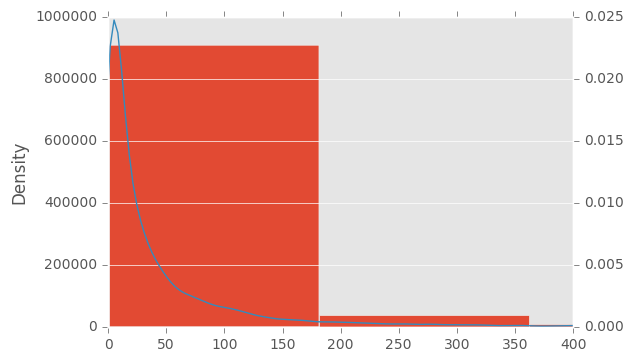

In [20]:
events_events_attr['nth'].plot(kind ='hist',bins = 9,xlim = (0,400))
events_events_attr['nth'].plot(kind='kde',secondary_y=True,xlim=(0,400))
# looking at the distribution of returning users.

## 1.) Provide a visualization shows Daily Active Users over time, broken down by platform (Android and iOS).

In [ ]:
## DAU: How many unique product users visit the product daily

In [21]:
## ios user events
ios_events = events[events['app_type'] =='ios']
android_events = events[events['app_type']=='android']

In [22]:
ios_events['day'][0:10]
#Monday is 0 and Sunday is 6
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [23]:
# So two approaches, one grouping by device and day to look at users for both ios and andriod.
# The other is looking at all user interactions that day for repeated users

In [24]:
ios_events.groupby(['device_uuid','day']).sum().reset_index().head()

,device_uuid,day,device_new,nth,weekday,week
0,000085bc7ddfa759a36e38ea4bf465fc1f349fae,13,1.0,10.0,12,60
1,000085bc7ddfa759a36e38ea4bf465fc1f349fae,14,0.0,5.0,4,15
2,000085bc7ddfa759a36e38ea4bf465fc1f349fae,24,0.0,6.0,0,17
3,0001710307f378fc08d1ac1a6573e917ccc2caad,18,1.0,144.0,46,736
4,0001710307f378fc08d1ac1a6573e917ccc2caad,19,0.0,7.0,2,16


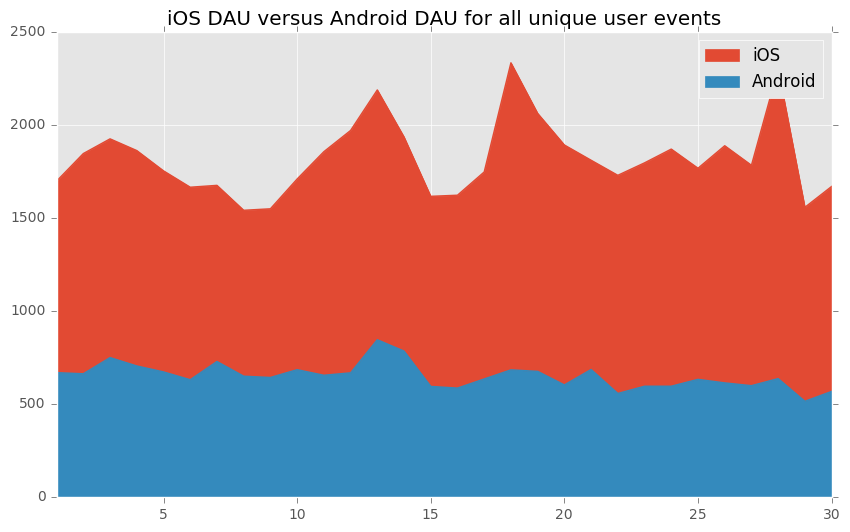

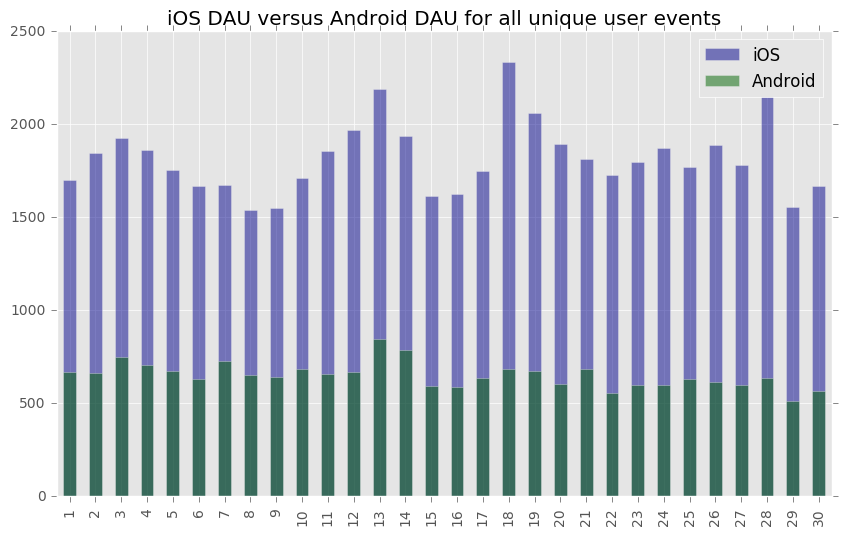

In [25]:
plt.figure(figsize= (10,6))
ios_events.groupby(['device_uuid','day']).sum().reset_index()['day'].value_counts().sort_index().plot(kind='area',label ='iOS')
android_events.groupby(['device_uuid','day']).sum().reset_index()['day'].value_counts().sort_index().plot(kind='area',label ='Android')
plt.legend()
plt.title('iOS DAU versus Android DAU for all unique user events')

plt.figure(figsize = (10,6))
ios_events.groupby(['device_uuid','day']).sum().reset_index()['day'].value_counts().sort_index().plot(kind='bar',label ='iOS',color ='darkblue',alpha =0.5)
android_events.groupby(['device_uuid','day']).sum().reset_index()['day'].value_counts().sort_index().plot(kind='bar',label ='Android',color='darkgreen',alpha = 0.5)
plt.legend()
plt.title('iOS DAU versus Android DAU for all unique user events')

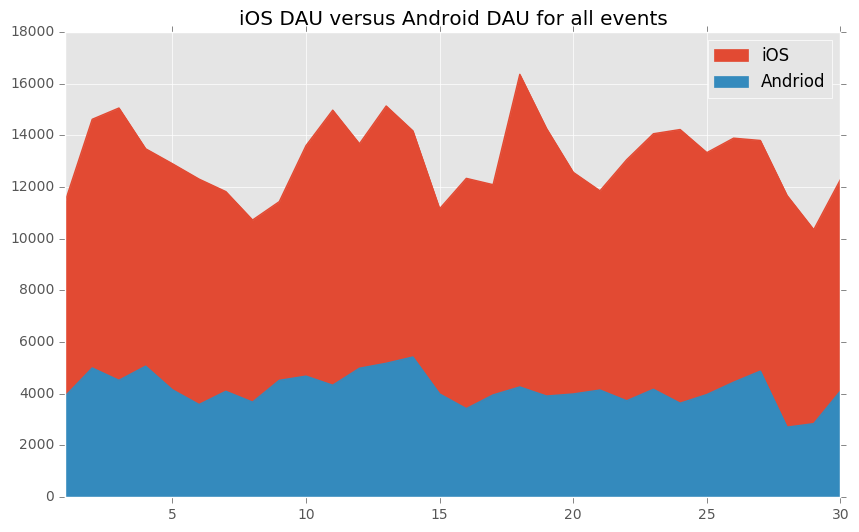

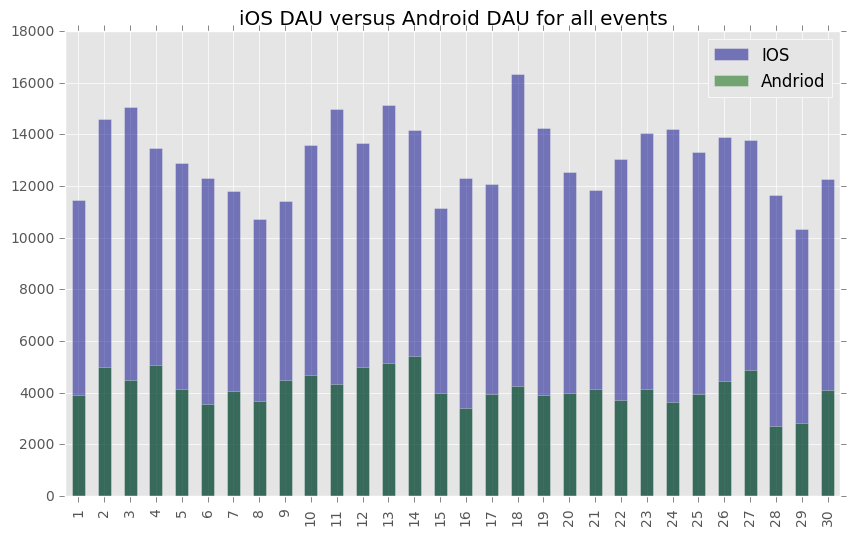

In [26]:
plt.figure(figsize= (10,6))
ios_events['day'].value_counts().sort_index().plot(kind = 'area',label = "iOS")
android_events['day'].value_counts().sort_index().plot(kind = 'area',label= 'Andriod')
plt.title('iOS DAU versus Android DAU for all events')
plt.legend()
plt.show()

plt.figure(figsize= (10,6))
ios_events['day'].value_counts().sort_index().plot(kind ='bar',label = 'iOS',color = 'darkblue',alpha = 0.5)
android_events['day'].value_counts().sort_index().plot(kind ='bar',label = 'Android',color = 'darkgreen',alpha = 0.5)
plt.legend(['IOS','Andriod'])
plt.title('iOS DAU versus Android DAU for all events')
plt.show()

In [27]:
weeks = set(ios_events['at'].apply(lambda x: x.week))

In [28]:
import calendar
ios_events['weekday_name'] =ios_events['weekday'].apply(lambda x: calendar.day_name[x])
android_events['weekday_name'] =android_events['weekday'].apply(lambda x: calendar.day_name[x])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


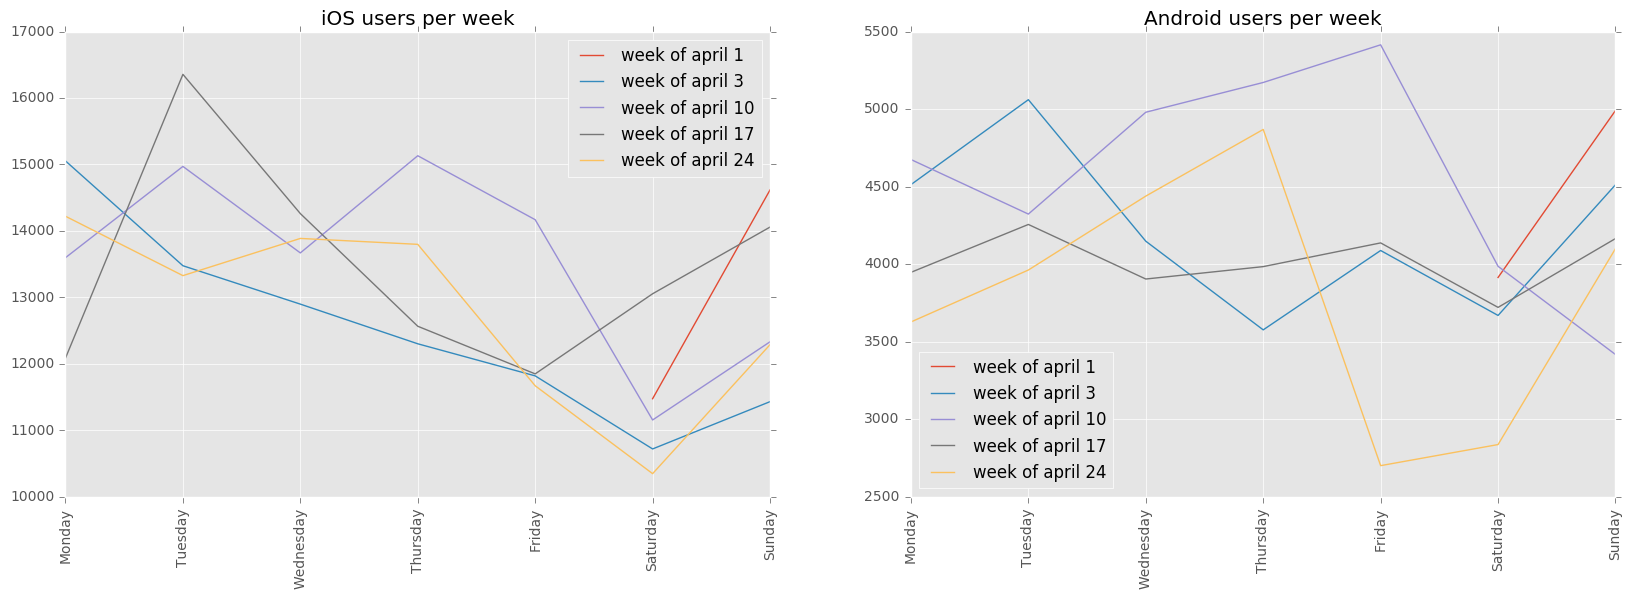

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
for week in sorted(weeks):
    ios_events[ios_events['week'] == week]['weekday'].value_counts().sort_index().plot(
        label = "week of april %s"%ios_events[ios_events['week'] == week].groupby(['week','day']).count().reset_index()['day'].min())
    
    plt.legend(loc ='best')
plt.xticks(np.arange(7),days,rotation=90)
plt.title('iOS users per week')
plt.subplot(1,2,2)
for week in sorted(weeks):
    android_events[android_events['week'] == week]['weekday'].value_counts().sort_index().plot(label = "week of april %s"%ios_events[ios_events['week'] == week].groupby(['week','day']).count().reset_index()['day'].min())
    plt.legend(loc ='best')
    plt.title('Android users per week')
plt.xticks(np.arange(7),days,rotation=90);

It's interesting to see different weekly peaks for users. Other useful plots, comparing week by week for user and android on the same plot. 

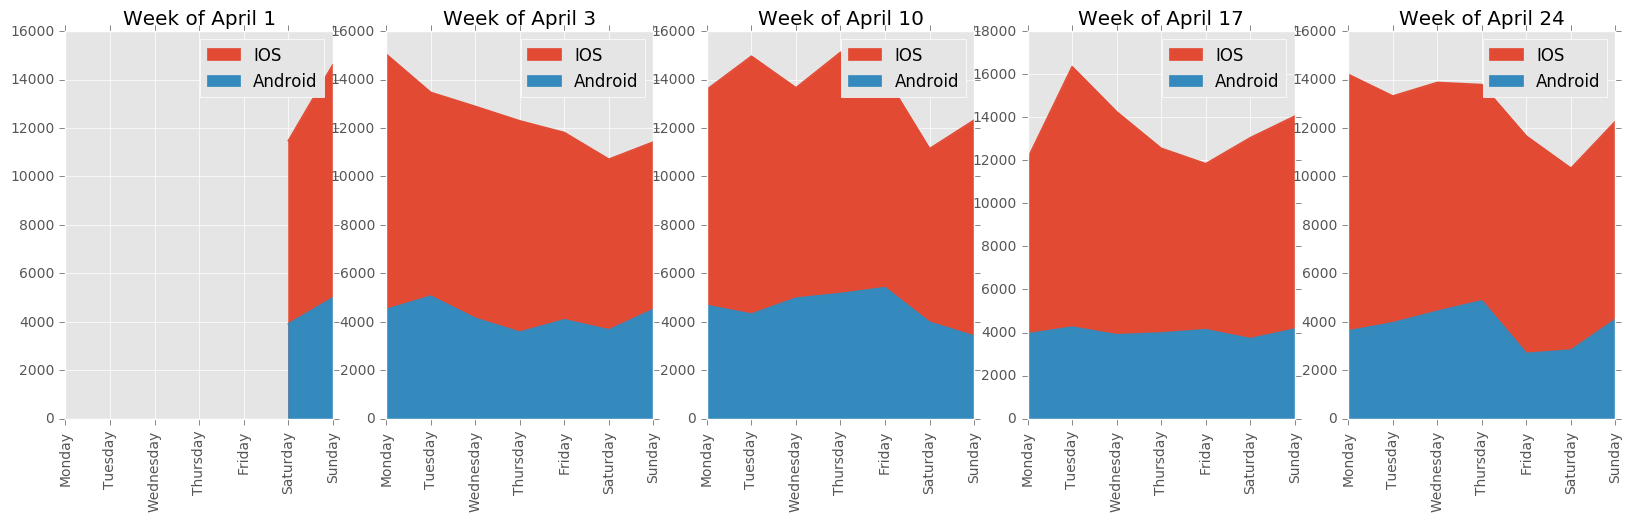

In [30]:
i =1
plt.figure(figsize= (20,5))
for week in sorted(weeks):
    plt.subplot(1,5,i)
    ios_events[ios_events['week'] == week]['weekday'].value_counts().sort_index().plot(kind='area',label='IOS')
    android_events[android_events['week'] == week]['weekday'].value_counts().sort_index().plot(kind='area',label = 'Android')
    plt.title('Week of April %s'%ios_events[ios_events['week'] == week].groupby(['week','day']).count().reset_index()['day'].min())
    i+=1
    plt.legend()
    plt.xticks(np.arange(7),days,rotation=90)

## 2.) Compile a list of the Top Ten most popular Schools in the Schoold App in April based on the data provided.
    -- a. Provide the steps and reasoning you took to carry out this analysis.
    -- b. What additional data may you need to provide a more accurate assessment, and how would you use that data?


#### Methodology 

Search user values in the value columns that have: 

    Unversity, College, Institute in their results and exclude others.

There are certain user events that might indicate interest in the school. This is to be distinguished from majors at the school.

    Events:
        schoolProfilePinningEvent
        schoolCardPinningEvent
        schoolProfileLanded 

    Amount of interest could be measured by:
    schoolProfileMajorButtonTapped

    For the intent of this question, this does not show interest in a range of colleges, but the level of interest in a single schools selection of programs.

In [31]:
relevent_events = event_attr[event_attr['event_name'].isin(['schoolProfilePinningEvent',
    'schoolCardPinningEvent'
    'schoolProfileLanded','schoolProfileMajorButtonTapped'] )]

In [32]:
relevent_events.head()

,at,event_name,field_name,uuid,value,day
3,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolName,3d161aa9c74f22f64f9ac17a4346b07e3574116a,Muskingum University,1
4,2017-04-01 00:00:03,schoolProfileMajorButtonTapped,schoolId,3d161aa9c74f22f64f9ac17a4346b07e3574116a,204264,1
5,2017-04-01 00:00:13,schoolProfileMajorButtonTapped,schoolName,1bcd2676d8e3cbf2253f0822af9bd3a6e54a116f,Syracuse University,1
6,2017-04-01 00:00:13,schoolProfileMajorButtonTapped,schoolId,1bcd2676d8e3cbf2253f0822af9bd3a6e54a116f,196413,1
16,2017-04-01 00:00:58,schoolProfileMajorButtonTapped,schoolName,178d8fce024f155244d61e3d7cacaa0124302b39,The New School,1


In [33]:
relevent_events['value'].value_counts()

Harvard University                             2064
166027                                         2064
Stanford University                            1957
243744                                         1957
New York University                            1895
193900                                         1895
University of California-Los Angeles           1651
110662                                         1651
University of Southern California              1233
123961                                         1233
University of Pennsylvania                     1124
215062                                         1124
190150                                         1120
Columbia University in the City of New York    1120
166683                                          975
Massachusetts Institute of Technology           975
110635                                          931
University of California-Berkeley               931
130794                                          903
Yale Univers

In [34]:
#search rows with only key terms and keep track of the college name. the other values may be schools, but that isn't explicit.
key_words = ['institute','college','university']
val_lower = relevent_events['value'].str.lower()
colleges = []
for val in val_lower:
    for key in key_words:
        if key in val:
            colleges.append(val)

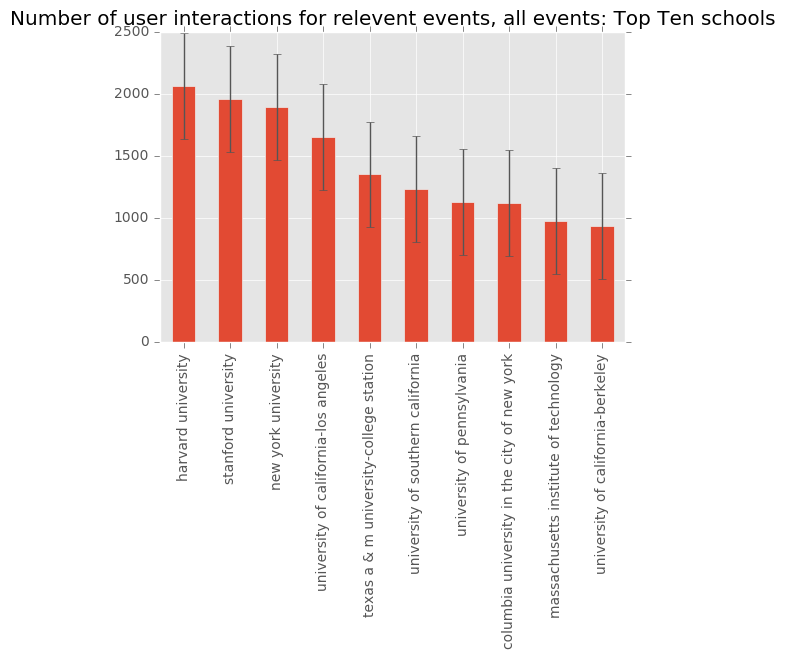

In [35]:
college_series = pd.Series(colleges)
## change list to series to count values and only look at the top ten colleges
college_series.value_counts()[0:10].plot(kind='bar',yerr=college_series.value_counts()[0:10].std())
plt.title('Number of user interactions for relevent events, all events: Top Ten schools')
top_ten = college_series.value_counts()[0:10]

## Once again, but this time, leaving out major button tapped

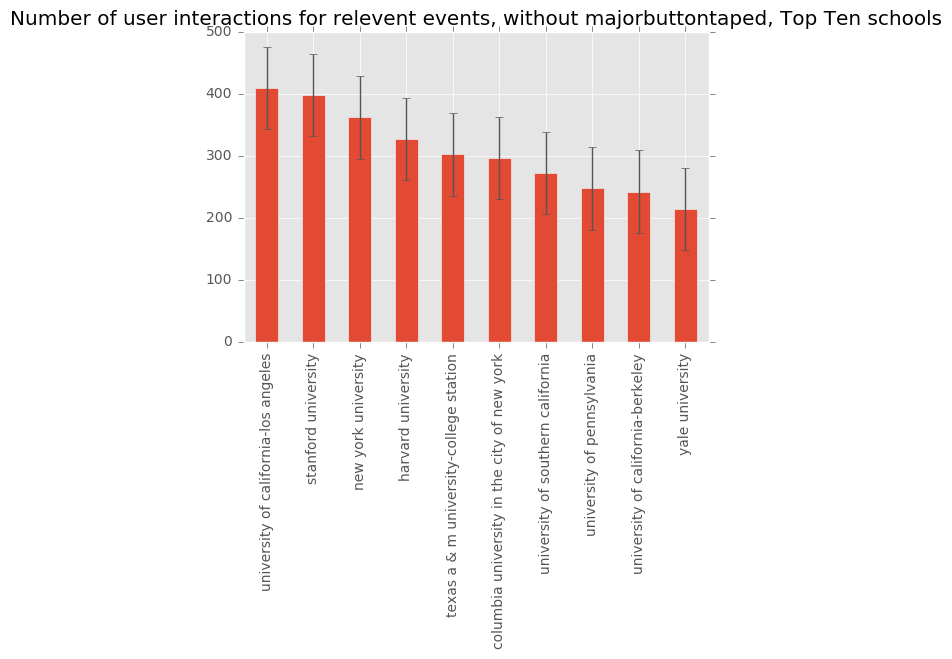

In [36]:
relevent_events_2 = event_attr[event_attr['event_name'].isin(['schoolProfilePinningEvent',
    'schoolCardPinningEvent'
    'schoolProfileLanded'] )]
#search rows with only key terms and keep track of the college name
key_words = ['institute','college','university']
val_lower = relevent_events_2['value'].str.lower()

colleges = []
for val in val_lower:
    for key in key_words:
        if key in val:
            colleges.append(val)
college_series = pd.Series(colleges)
## change list to series to count values and only look at the top ten colleges
college_series.value_counts()[0:10].plot(kind='bar',yerr = college_series.value_counts()[0:10].std())
plt.title('Number of user interactions for relevent events, without majorbuttontaped, Top Ten schools')

top_ten_2 = college_series.value_counts()[0:10]

In [46]:
zip(top_ten.index, top_ten_2.index)

[('harvard university', 'university of california-los angeles'),
 ('stanford university', 'stanford university'),
 ('new york university', 'new york university'),
 ('university of california-los angeles', 'harvard university'),
 ('texas a & m university-college station',
  'texas a & m university-college station'),
 ('university of southern california',
  'columbia university in the city of new york'),
 ('university of pennsylvania', 'university of southern california'),
 ('columbia university in the city of new york', 'university of pennsylvania'),
 ('massachusetts institute of technology',
  'university of california-berkeley'),
 ('university of california-berkeley', 'yale university')]

In [42]:
[i for i, j in zip(top_ten.index, top_ten_2.index) if i == j]

['stanford university',
 'new york university',
 'texas a & m university-college station']

In [55]:
set(top_ten_2.index)-set(top_ten.index)

{'yale university'}

In [53]:
set(top_ten.index)-set(top_ten_2.index)

{'massachusetts institute of technology'}

In [57]:
set(top_ten.index)^set(top_ten_2.index)

{'massachusetts institute of technology', 'yale university'}

We see a different ordering, with lower counts, but with some of the same schools, and three that do not match.
Both results are reasonable, I believe the first, including the major button tapped shows an invested interest in a school as opposed to just a screening.

## 3.) For the top four popular schools, provide a useful visualization of daily engagement numbers with their profiles using the available data. This may be a visualization that we would provide to our sales staff to help them understand how users are engaging and interacting with different school profiles. Note any interesting trends you see, if any.

###### Looking at interesting interactions/events from each user, so this won't be like a daily active user count this will look at the unique events that all users make, split by the unique events over the month of april. This will allow us to see trends and different magnitudes of 

In [58]:
top_four_colleges = list(college_series.value_counts()[0:4].index)
top_four_colleges

['university of california-los angeles',
 'stanford university',
 'new york university',
 'harvard university']

In [59]:
events_events_attr.head()

,app_type,at_x,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth,day,weekday,week,at_y,event_name,field_name,value,counts
0,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,parentType,major,1
1,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolName,Arizona State University-Tempe,1
2,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolId,104151,1
3,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolName,Carnegie Mellon University,1
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolId,211440,1


In [60]:
# relevent_events['value'] = relevent_events['value'].str.lower()

In [61]:
df_user_event= events_events_attr.groupby(['device_uuid','day','at_x','event_name','value']).sum().reset_index()

In [62]:
df_user_event.head()

,device_uuid,day,at_x,event_name,value,device_new,nth,weekday,week,counts
0,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:52:00,schoolProfileLanded,110662,0.0,2.0,1,16,1
1,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:52:00,schoolProfileLanded,University of California-Los Angeles,0.0,2.0,1,16,1
2,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:52:00,schoolProfileLanded,homeExploreScreen,0.0,2.0,1,16,1
3,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:54:10,schoolProfileLanded,243744,0.0,3.0,1,16,1
4,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:54:10,schoolProfileLanded,Stanford University,0.0,3.0,1,16,1


In [63]:
df_user_event['value'] = df_user_event['value'].str.lower()

In [64]:
top_four_values = df_user_event[df_user_event['value'].isin(top_four_colleges)]

In [65]:
top_four_values.head()

,device_uuid,day,at_x,event_name,value,device_new,nth,weekday,week,counts
1,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:52:00,schoolProfileLanded,university of california-los angeles,0.0,2.0,1,16,1
4,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:54:10,schoolProfileLanded,stanford university,0.0,3.0,1,16,1
7,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:54:20,schoolProfileLanded,university of california-los angeles,0.0,3.0,1,16,1
10,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 01:54:24,schoolProfileLanded,harvard university,0.0,3.0,1,16,1
87,0001710307f378fc08d1ac1a6573e917ccc2caad,18,2017-04-18 02:01:05,schoolProfileLanded,university of california-los angeles,0.0,3.0,1,16,1


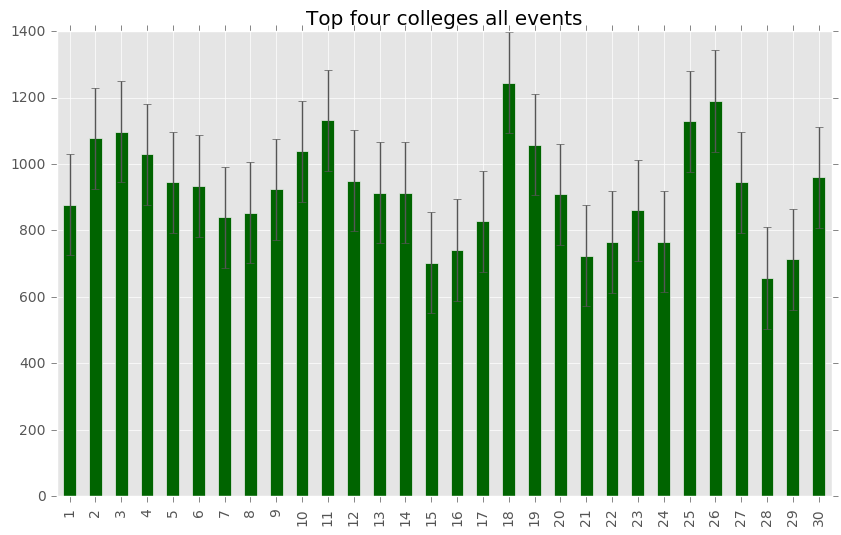

In [66]:
plt.figure(figsize=(10,6))
top_four_values['day'].value_counts().sort_index().plot(kind='bar',yerr = top_four_values['day'].value_counts().sort_index().std(),color ='darkgreen')
plt.title('Top four colleges all events')

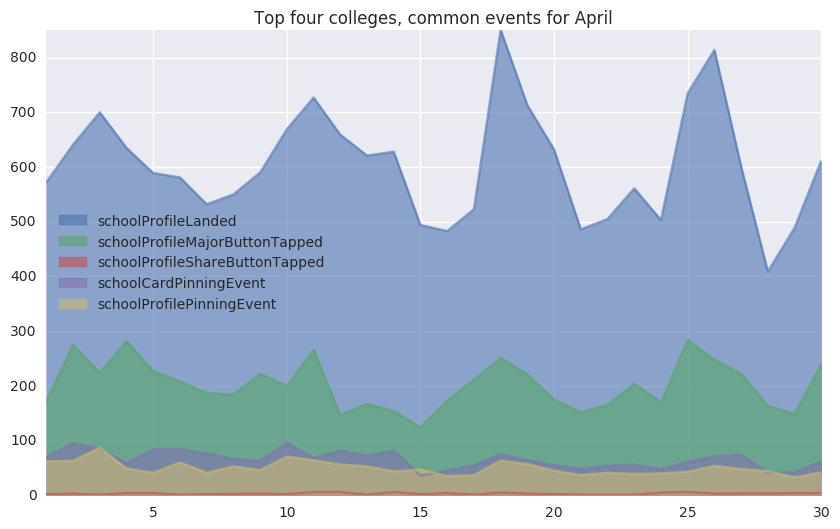

In [75]:
plt.figure(figsize = (10,6))
for event in set(top_four_values['event_name']):
    top_four_values[top_four_values['event_name'] == event]['day'].value_counts().sort_index().plot(kind ='area',alpha =0.6,label =event,ylim = (0,850))
    plt.legend(loc = 'best')
plt.title('Top four colleges, common events for April')

ShareButtonTapped is very low in consideration of everything else. Profile landings and major buttons are the most used, which makes sense as a user trying to learn more about a school.

In [70]:
weeks = set(top_four_values['at_x'].apply(lambda x: x.week))

In [71]:
top_four_values['week'] = top_four_values['at_x'].apply(lambda x: x.week)
top_four_values['weekday'] = top_four_values['at_x'].apply(lambda x: x.weekday())

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


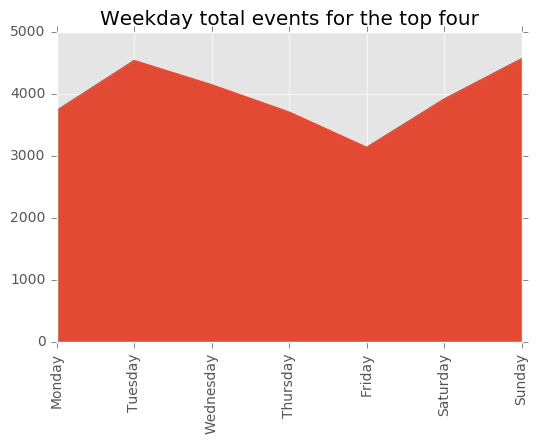

In [72]:
top_four_values['weekday'].value_counts().sort_index().plot(kind ='area')
plt.xticks(np.arange(7),days,rotation=90);
plt.title('Weekday total events for the top four')

Each full week of april there are two peaks one on the first day and on on the weekend.

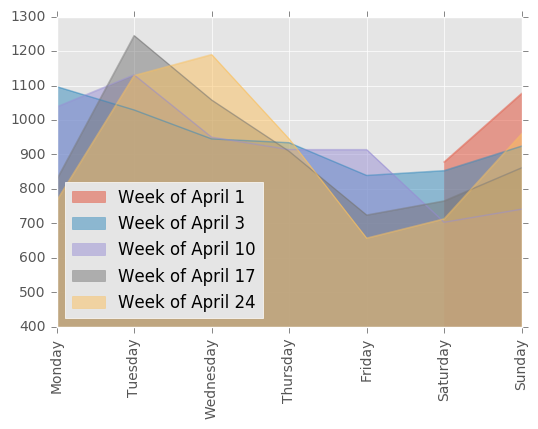

In [73]:
#the profile sharing is signifigantly low, that would be interesting to look into!
for week in sorted(weeks):
    tfw=top_four_values[top_four_values['week'] == week]
    tfw['weekday'].value_counts().sort_index().plot(kind ='area',
                                                    label = 'Week of April %s' % tfw.groupby(['week','day']).count().reset_index()['day'].min(),
                                                    ylim =(400,1300),alpha = 0.5)
    plt.legend(loc='best')
    plt.xticks(np.arange(7),days,rotation=90)
# for each week in the month of april look at the top four colleges and

This plot also shows a rise at the beginning of the week and a dip towards the weekend.

Lets look a little more into the events that are taking place for these top four colleges per week.

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


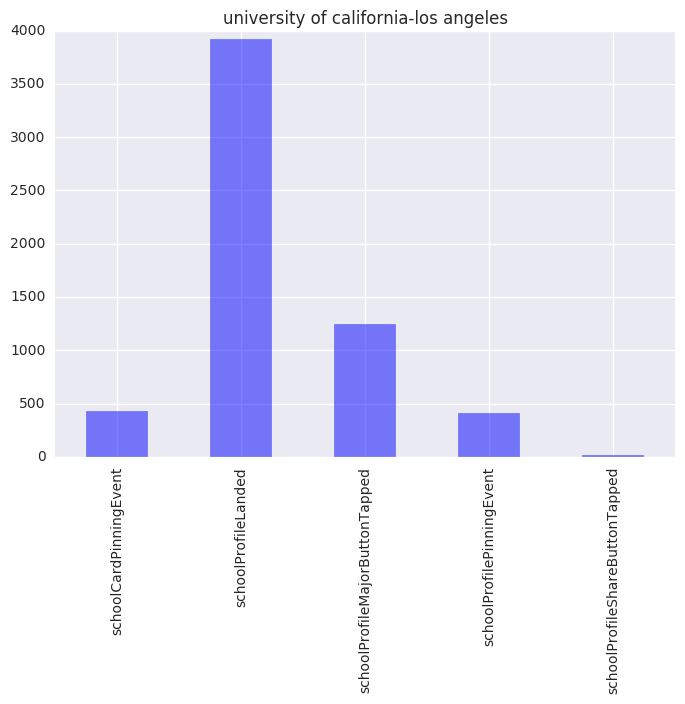

schoolCardPinningEvent             430
schoolProfileLanded               3925
schoolProfileMajorButtonTapped    1242
schoolProfilePinningEvent          409
schoolProfileShareButtonTapped      18
Name: event_name, dtype: int64


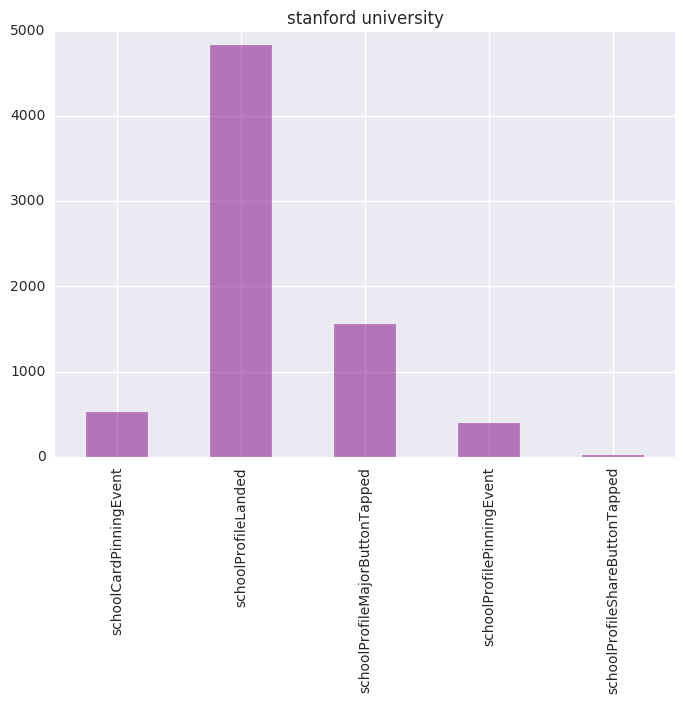

schoolCardPinningEvent             530
schoolProfileLanded               4826
schoolProfileMajorButtonTapped    1559
schoolProfilePinningEvent          398
schoolProfileShareButtonTapped      23
Name: event_name, dtype: int64


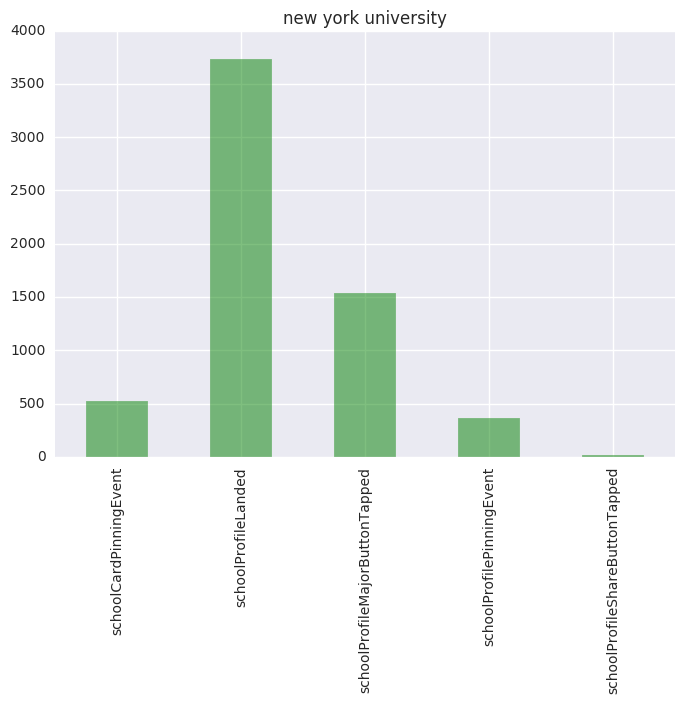

schoolCardPinningEvent             524
schoolProfileLanded               3729
schoolProfileMajorButtonTapped    1533
schoolProfilePinningEvent          362
schoolProfileShareButtonTapped      14
Name: event_name, dtype: int64


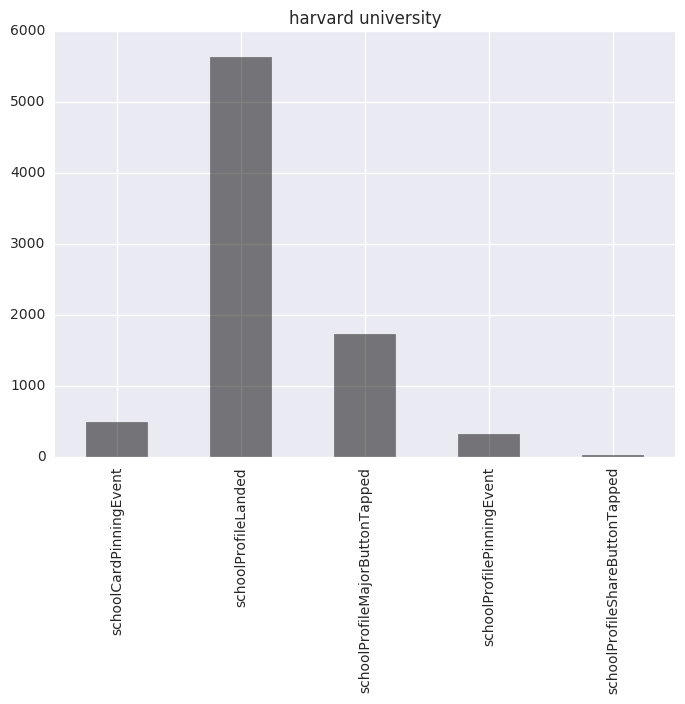

schoolCardPinningEvent             486
schoolProfileLanded               5625
schoolProfileMajorButtonTapped    1734
schoolProfilePinningEvent          326
schoolProfileShareButtonTapped      23
Name: event_name, dtype: int64


In [74]:
color = ['blue','purple','green','black']
import seaborn as sns
for i in range(0,4):
    val =top_four_values[top_four_values['value'] == top_four_colleges[i]]['event_name'].value_counts().sort_index()
    val.plot(kind ='bar',color = color[i],alpha = 0.5)
    plt.title(top_four_colleges[i])
    plt.show()
    print(val)

Sharing their profile seems to be the weakest trend accross all events. That's rather interesting to note.

### 4.) Pinning/Favoriting events are of importance to us at Schoold since they are often a sign of an engaged user, and allows us to gauge their specific interest in schools. Identify a single metric that can be used with this data to gauge performance of this feature. Ideally this is a metric that can be calculated from time to time to assess increased/decreased performance of this feature (i.e. with new app releases).
    a. Calculate and report that metric for the month of April 2017.
    b. Justify using this metric and how you calculated it.


In [76]:
events_events_attr.head()

,app_type,at_x,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth,day,weekday,week,at_y,event_name,field_name,value,counts
0,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,parentType,major,1
1,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolName,Arizona State University-Tempe,1
2,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolId,104151,1
3,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolName,Carnegie Mellon University,1
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolId,211440,1


In [77]:
events_events_attr.shape[0]

968592

In [84]:
us_count = events_events_attr[events_events_attr['country'] =='us'].shape[0]*1.0/events_events_attr.shape[0] * 100
print('percentage of users in the US: %0.5f'%us_count)

percentage of users in the US: 91.46266


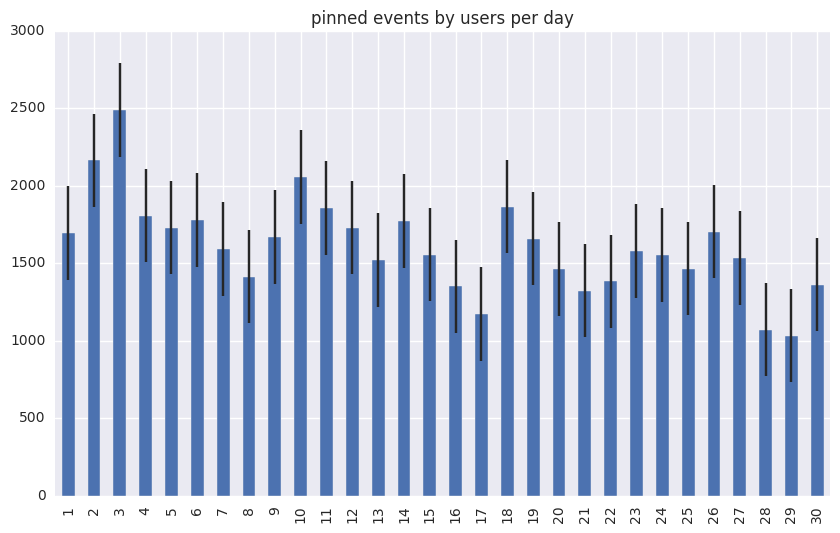

In [85]:
pinned = events_events_attr[events_events_attr['event_name'] == 'schoolProfilePinningEvent']
## lets look at pinned users per day
plt.figure(figsize=(10,6))
errors = np.std(pinned['day'].value_counts().sort_index())
pinned['day'].value_counts().sort_index().plot(kind ='bar',yerr= errors)
plt.title('pinned events by users per day')
plt.show()

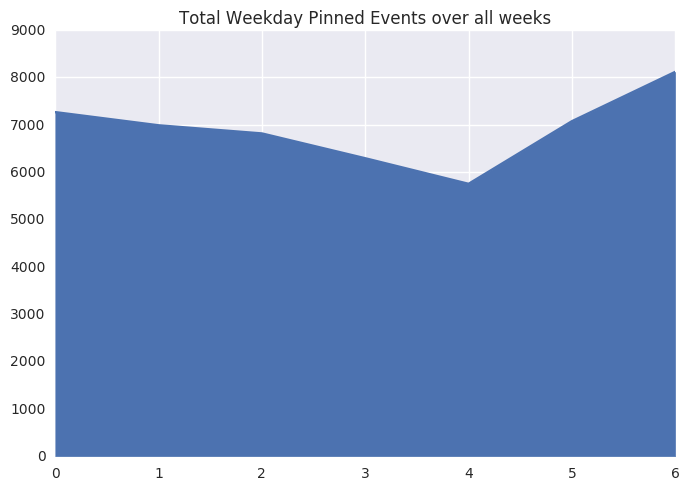

In [86]:
pinned['weekday'].value_counts().sort_index().plot(kind='area')
plt.title('Total Weekday Pinned Events over all weeks')

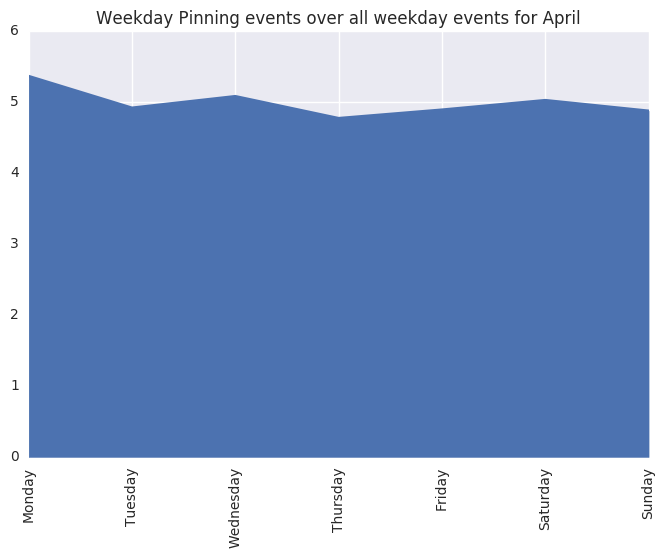

In [87]:
## look at all interactions versus how often people pin per day over the course of the month
(pinned['weekday'].value_counts().sort_index()/events_events_attr['weekday'].value_counts().sort_index()* 100).plot(kind='area')
plt.xticks(np.arange(7),days,rotation = 90);
plt.title('Weekday Pinning events over all weekday events for April')

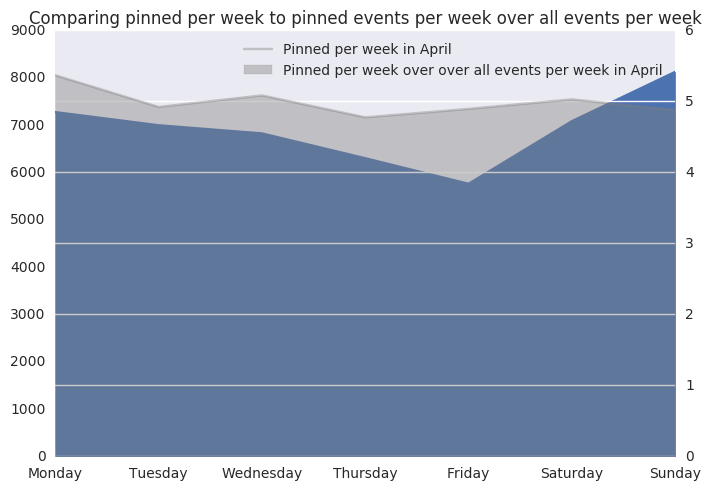

In [90]:
pinned['weekday'].value_counts().sort_index().plot(kind='area')
## look at all interactions versus how often people pin per day over the course of the month
(pinned['weekday'].value_counts().sort_index()/events_events_attr['weekday'].value_counts().sort_index()* 100).plot(kind='area',secondary_y=True,alpha = 0.4,color ='grey')
plt.xticks(np.arange(7),days,rotation = 90)
plt.legend(['Pinned per week in April','Pinned per week over over all events per week in April'])
plt.title('Comparing pinned per week to pinned events per week over all events per week')

In [91]:
## look at the number of user sessions and count how many times they pin
pinned['count'] = 1

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [92]:
pin_group = events_events_attr.groupby(['device_uuid','day'])['nth'].max().reset_index()
count_pinned = pinned.groupby(['device_uuid','day']).sum()['count'].reset_index()
pin_merge_max_nth = pd.merge(pin_group,count_pinned,on='device_uuid')
pin_merge_max_nth['count per nth'] = pin_merge_max_nth['count']/pin_merge_max_nth['nth']

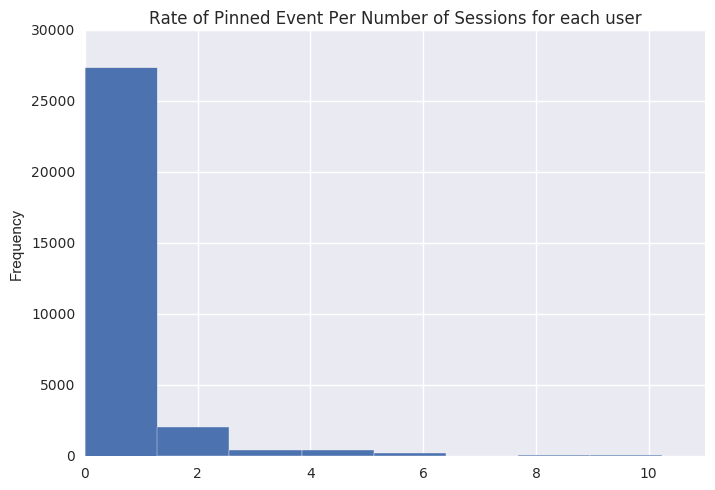

In [93]:
pin_merge_max_nth['count per nth'].plot(kind ='hist',bins = 50,xlim=(0,11))
plt.title('Rate of Pinned Event Per Number of Sessions for each user')

## 5.) How users discover content in our app is important for us to track. Create a useful visualization that demonstrates how users are discovering school profiles.
    a. What is the most common source and do you find this result surprising?
    b. How would you use this finding to make a recommendation to the Product Team for new features and/or feature enhancements? How would you track the success of your recommendations?
    c. What further analysis would you be interested in completing to explore this further?


Sources to follow for SchoolProfileLanded and schoolCardPinningEvent

"parentType - The location in the app the user was when they completed either event"

Parent Types:

        curated -
        deeplink
        geopoint
        homeExploreScreen
        homeScreen
        location
        csa
        major
        mySchools
        occupation
        schoolSearch

In [94]:
parent_type= ['curated','deeplink','geoPoint','homeExploreScreen','homeScreen',
'location','csa','major','mySchools','occupation','schoolSearch','myschools']
len(parent_type)

12

In [95]:
spl_df = events_events_attr[(events_events_attr['event_name']=='schoolProfileLanded') | (events_events_attr['event_name']== 'schoolCardPinningEvent')]

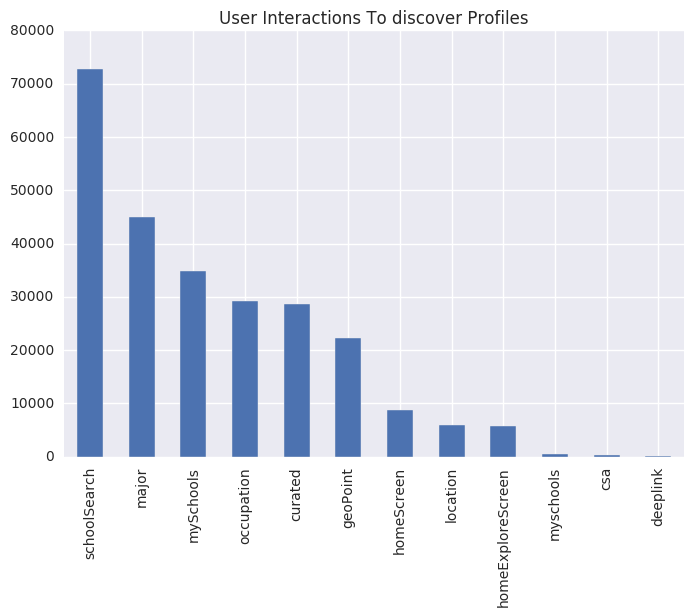

In [96]:
spl_df[spl_df['value'].isin(parent_type)]['value'].value_counts().plot(kind = 'bar')
plt.title('User Interactions To discover Profiles')

It would be interesting to see which interactions lead to others: what events happen directly after another: look at association rules

In [97]:
spl_df[spl_df['value'].isin(parent_type)]['value'].value_counts()

schoolSearch         72786
major                44969
mySchools            34815
occupation           29170
curated              28736
geoPoint             22291
homeScreen            8846
location              5994
homeExploreScreen     5731
myschools              520
csa                    276
deeplink                44
Name: value, dtype: int64

In [98]:
events_events_attr.head()

,app_type,at_x,birthdate_timestamp,city_name,country,device_new,device_uuid,name,uuid,nth,day,weekday,week,at_y,event_name,field_name,value,counts
0,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,parentType,major,1
1,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolName,Arizona State University-Tempe,1
2,android,2017-04-17 20:12:51,2017-04-17 20:07:37,NaN,us,True,a98b9c6909cc8647ab7b7d112efe1232fa42b924,schoolCardPinningEvent,011700e9f19d9579164cbbfecaec48431df3bde9,1.0,17,0,16,2017-04-17 20:12:51,schoolCardPinningEvent,schoolId,104151,1
3,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolName,Carnegie Mellon University,1
4,ios,2017-04-25 19:37:42,2017-04-22 01:50:13,NaN,us,False,de8a4b7771942c67780c826c108556d43ad58178,schoolProfilePinningEvent,011732c281f93c2e305252cb4e46551e4cfbe8dc,12.0,25,1,17,2017-04-25 19:37:42,schoolProfilePinningEvent,schoolId,211440,1


Selecting only events that are landings and schoolcard pinnings so that the parenttypes can be analyzed

schoolSearch         72786
major                44969
mySchools            34815
occupation           29170
curated              28736
geoPoint             22291
homeScreen            8846
location              5994
homeExploreScreen     5731
deepLink              1255
homescreen             604
myschools              520
csa                    276
deeplink                44
-1                       3
Name: value, dtype: int64

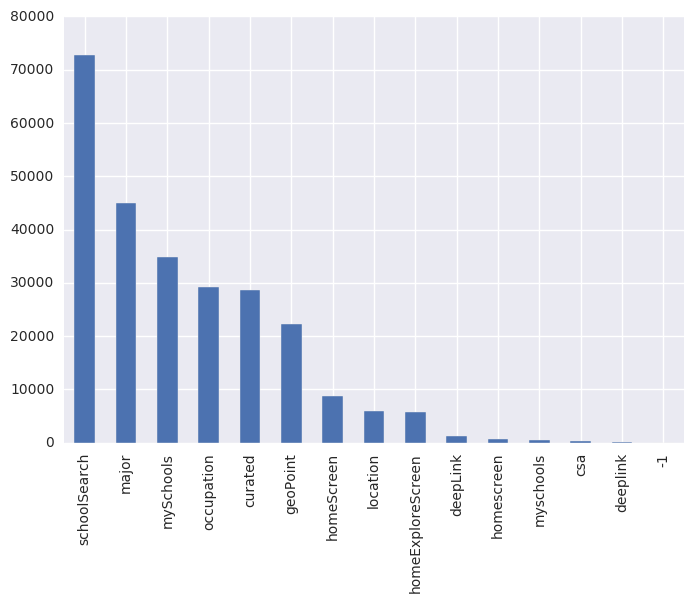

In [99]:
parent_df = events_events_attr[events_events_attr['field_name'] == 'parentType']
parent_df['value'].value_counts().plot(kind = 'bar')
parent_df['value'].value_counts()

It looks as if schoolsearch is the most popular by far for users all around. Only a few bad datapoints of -1.

## 6.) What data cleaning did you have to do during this exercise if any? Was there anything new that you learned while completing this challenge? How much time did you spend on the challenge all together?

-- No Actual data cleaning, did sorting and indexing mostly.
-- I experimented with concise plotting and trying to be minimal with my style of visualization. Designing metrics can be tricky, I didn't want to get to complicated

--I spent a few good hours working on the problem. I had a hard time stopping and moving on from topic to topic, I wanted to be thurough and make sure I caught everything.